Logictic regression is one of the technique used for classification  
In otherwords used when predection value is catogerical

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


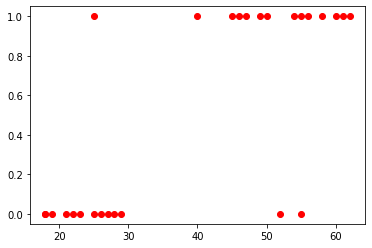

In [ ]:
plt.scatter(df['age'], df['bought_insurance'], color='red')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[['age']], df['bought_insurance'], test_size = 0.1, random_state = 42)

In [ ]:
X_test

,age
8,62
13,29
9,61


In [ ]:
X_train

,age
21,26
0,22
11,28
16,25
17,58
12,27
24,50
1,25
4,46
5,56


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.predict(X_test)

array([1, 0, 1])

In [ ]:
lr.score(X_test, Y_test)

1.0

Exercise

In [3]:
dfe = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/Exercise/HR_comma_sep.csv")
dfe

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
print("ROws: ",dfe.shape[0])
print("Columns: ",dfe.shape[1])

ROws:  14999
Columns:  10


In [ ]:
dfe.isnull().sum()
#we do not have to worry about null values

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [ ]:
dfe.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
dfe.dtypes  

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [8]:
left = dfe[dfe['left'] == 1]  #this are the records where the person leaves the company
left.shape 

(3571, 10)

In [9]:
retained = dfe[dfe['left'] == 0]
retained.shape

(11428, 10)

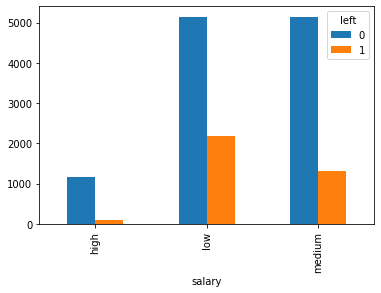

In [15]:
pd.crosstab(dfe['salary'], dfe['left']).plot(kind='bar')

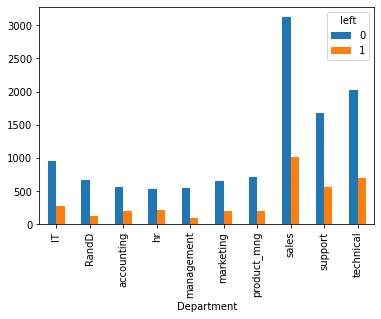

In [16]:
pd.crosstab(dfe['Department'], dfe['left']).plot(kind='bar')

In [18]:
subdf = dfe[['satisfaction_level','average_montly_hours', 'time_spend_company', 'promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,salary
0,0.38,157,3,0,low
1,0.80,262,6,0,medium
2,0.11,272,4,0,medium
3,0.72,223,5,0,low
4,0.37,159,3,0,low


In [22]:
salary_dummies = pd.get_dummies(dfe['salary'], prefix='salary')
salary_dummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [24]:
dfe_dummie = pd.concat([subdf, salary_dummies], axis='columns')
dfe_dummie

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,3,0,low,0,1,0
1,0.80,262,6,0,medium,0,0,1
2,0.11,272,4,0,medium,0,0,1
3,0.72,223,5,0,low,0,1,0
4,0.37,159,3,0,low,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,151,3,0,low,0,1,0
14995,0.37,160,3,0,low,0,1,0
14996,0.37,143,3,0,low,0,1,0
14997,0.11,280,4,0,low,0,1,0


In [26]:
dfe_dummie.drop('salary', axis=1, inplace=True)
dfe_dummie

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,3,0,0,1,0
1,0.80,262,6,0,0,0,1
2,0.11,272,4,0,0,0,1
3,0.72,223,5,0,0,1,0
4,0.37,159,3,0,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,3,0,0,1,0
14995,0.37,160,3,0,0,1,0
14996,0.37,143,3,0,0,1,0
14997,0.11,280,4,0,0,1,0


In [28]:
X = dfe_dummie
Y = dfe.left

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.2, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression
lre = LogisticRegression()

In [31]:
lre.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
lre.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
lre.score(X_test, Y_test)

0.76525